## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_10774_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (90914, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac         lng  \
0      GSABZT020K000A231128206  2024-02-09 15:30:00  NaN  5.06  119.601494   
1      GSABZT020K000A231128206  2024-02-09 15:35:00  NaN  4.81  119.601494   
2      GSABZT020K000A231128206  2024-02-09 15:40:00  NaN  4.66  119.601494   
3      GSABZT020K000A231128206  2024-02-09 15:45:00  NaN  4.28  119.601494   
4      GSABZT020K000A231128206  2024-02-09 15:50:00  NaN  4.07  119.601494   
...                        ...                  ...  ...   ...         ...   
90909  GSABZT020K000A231128206  2025-05-10 18:45:00  0.0  0.07  119.601494   
90910  GSABZT020K000A231128206  2025-05-10 18:50:00  0.0  0.04  119.601494   
90911  GSABZT020K000A231128206  2025-05-10 18:55:00  0.0  0.04  119.601494   
90912  GSABZT020K000A231128206  2025-05-10 19:00:00  0.0  0.02  119.601494   
90913  GSABZT020K000A231128206  2025-05-10 19:05:00  0.0  0.01  119.601494   

            lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      33.59673     斜屋顶双坡   15.0          8.4675               50.7238  ...   
1      33.59673     斜屋顶双坡   15.0             NaN                   NaN  ...   
2      33.59673     斜屋顶双坡   15.0             NaN                   NaN  ...   
3      33.59673     斜屋顶双坡   15.0          8.2815               51.4849  ...   
4      33.59673     斜屋顶双坡   15.0             NaN                   NaN  ...   
...         ...       ...    ...             ...                   ...  ...   
90909  33.59673     斜屋顶双坡   15.0         16.2701               71.4866  ...   
90910  33.59673     斜屋顶双坡   15.0             NaN                   NaN  ...   
90911  33.59673     斜屋顶双坡   15.0             NaN                   NaN  ...   
90912  33.59673     斜屋顶双坡   15.0         15.9726               72.3121  ...   
90913  33.59673     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                      445.3825            87.5286          4.2335   
1                           NaN                NaN             NaN   
2                           NaN                NaN             NaN   
3                      391.7623            76.7865          4.1325   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
90909                    2.5220             6.2163          2.6160   
90910                       NaN                NaN             NaN   
90911                       NaN                NaN             NaN   
90912                    1.2610             3.1082          2.5247   
90913                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              5.7070           6.0494            232.5321   
1                 NaN              NaN                 NaN   
2                 NaN              NaN                 NaN   
3              5.6797           6.0457            231.7349   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
90909          5.0667           5.7690            289.4114   
90910             NaN              NaN                 NaN   
90911             NaN              NaN                 NaN   
90912          5.0480           5.7816            286.5757   
90913             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                232.8378             232.9560  2024-02-09 15:30:00   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                232.1178             232.2532  2024-02-09 15:45:00   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
90909            293.7344             294.7562  2025-05-10 

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2024-02-09 15:30:00  GSABZT020K000A231128206  2024-02-09 15:30:00  NaN   
1      2024-02-09 15:35:00  GSABZT020K000A231128206  2024-02-09 15:35:00  NaN   
2      2024-02-09 15:40:00  GSABZT020K000A231128206  2024-02-09 15:40:00  NaN   
3      2024-02-09 15:45:00  GSABZT020K000A231128206  2024-02-09 15:45:00  NaN   
4      2024-02-09 15:50:00  GSABZT020K000A231128206  2024-02-09 15:50:00  NaN   
...                    ...                      ...                  ...  ...   
131367 2025-05-10 18:45:00  GSABZT020K000A231128206  2025-05-10 18:45:00  0.0   
131368 2025-05-10 18:50:00  GSABZT020K000A231128206  2025-05-10 18:50:00  0.0   
131369 2025-05-10 18:55:00  GSABZT020K000A231128206  2025-05-10 18:55:00  0.0   
131370 2025-05-10 19:00:00  GSABZT020K000A231128206  2025-05-10 19:00:00  0.0   
131371 2025-05-10 19:05:00  GSABZT020K000A231128206  2025-05-10 19:05:00  0.0   

         pac         lng       lat roof_type  angle  temperature_2m  ...  \
0       5.06  119.601494  33.59673     斜屋顶双坡   15.0          8.4675  ...   
1       4.81  119.601494  33.59673     斜屋顶双坡   15.0             NaN  ...   
2       4.66  119.601494  33.59673     斜屋顶双坡   15.0             NaN  ...   
3       4.28  119.601494  33.59673     斜屋顶双坡   15.0          8.2815  ...   
4       4.07  119.601494  33.59673     斜屋顶双坡   15.0             NaN  ...   
...      ...         ...       ...       ...    ...             ...  ...   
131367  0.07  119.601494  33.59673     斜屋顶双坡   15.0         16.2701  ...   
131368  0.04  119.601494  33.59673     斜屋顶双坡   15.0             NaN  ...   
131369  0.04  119.601494  33.59673     斜屋顶双坡   15.0             NaN  ...   
131370  0.02  119.601494  33.59673     斜屋顶双坡   15.0         15.9726  ...   
131371  0.01  119.601494  33.59673     斜屋顶双坡   15.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0               143.7260                  445.3825            87.5286   
1                    NaN                       NaN                NaN   
2                    NaN                       NaN                NaN   
3               112.9418                  391.7623            76.7865   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
131367            0.2960                    2.5220             6.2163   
131368               NaN                       NaN                NaN   
131369               NaN                       NaN                NaN   
131370            0.1480                    1.2610             3.1082   
131371               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               4.2335          5.7070           6.0494            232.5321   
1                  NaN             NaN              NaN                 NaN   
2                  NaN             NaN              NaN                 NaN   
3               4.1325          5.6797           6.0457            231.7349   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
131367          2.6160          5.0667           5.7690            289.4114   
131368             NaN             NaN              NaN                 NaN   
131369             NaN             NaN              NaN                 NaN   
131370          2.5247          5.0480           5.7816            286.5757   
131371             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                 232.8378             232.9560  2024-02-09 15:30:00  
1                      NaN                  NaN                  NaN  
2                      NaN                  NaN                  NaN  
3                 232

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    34,     35,     36,     37,     38,     39,     40,     41,     42,
            43,
        ...
        131191, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199,
        131200],
       dtype='int64', length=60680),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    34,     35,     36,     37,     38,     39,     40,     41,     42,
            43,
        ...
        131191, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199,
        131200],
       dtype='int64', length=60680),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        131191, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199,
        131200],
       dtype='int64', length=62263),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    34,     35,     36,     37,     38,     39,     40,     41,     42,
            43,
        ...
        131191, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199,
        131200],
       dtype='int64', length=60680),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    34,     35,     36,     37,     38,     39,     40,     41,     42,
            43,
        ...
        131191, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199,
        131200],
       dtype='int64', length=60680),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     1,      2,      4,      5,      7,      8,     10,     11,     13,
            14,
        ...
        131357, 131359, 131360, 131362, 131363, 131365, 131366, 131368, 131369,
        131371],
       dtype='int64', length=87581),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2024-02-09 15:30:00  GSABZT020K000A231128206  2024-02-09 15:30:00  0.0   
1      2024-02-09 15:35:00  GSABZT020K000A231128206  2024-02-09 15:35:00  0.0   
2      2024-02-09 15:40:00  GSABZT020K000A231128206  2024-02-09 15:40:00  0.0   
3      2024-02-09 15:45:00  GSABZT020K000A231128206  2024-02-09 15:45:00  0.0   
4      2024-02-09 15:50:00  GSABZT020K000A231128206  2024-02-09 15:50:00  0.0   
...                    ...                      ...                  ...  ...   
131367 2025-05-10 18:45:00  GSABZT020K000A231128206  2025-05-10 18:45:00  0.0   
131368 2025-05-10 18:50:00  GSABZT020K000A231128206  2025-05-10 18:50:00  0.0   
131369 2025-05-10 18:55:00  GSABZT020K000A231128206  2025-05-10 18:55:00  0.0   
131370 2025-05-10 19:00:00  GSABZT020K000A231128206  2025-05-10 19:00:00  0.0   
131371 2025-05-10 19:05:00  GSABZT020K000A231128206  2025-05-10 19:05:00  0.0   

         pac         lng       lat roof_type  angle  temperature_2m  ...  \
0       5.06  119.601494  33.59673     斜屋顶双坡   15.0        8.467500  ...   
1       4.81  119.601494  33.59673     斜屋顶双坡   15.0        8.405500  ...   
2       4.66  119.601494  33.59673     斜屋顶双坡   15.0        8.343500  ...   
3       4.28  119.601494  33.59673     斜屋顶双坡   15.0        8.281500  ...   
4       4.07  119.601494  33.59673     斜屋顶双坡   15.0        8.258733  ...   
...      ...         ...       ...       ...    ...             ...  ...   
131367  0.07  119.601494  33.59673     斜屋顶双坡   15.0       16.270100  ...   
131368  0.04  119.601494  33.59673     斜屋顶双坡   15.0       16.170933  ...   
131369  0.04  119.601494  33.59673     斜屋顶双坡   15.0       16.071767  ...   
131370  0.02  119.601494  33.59673     斜屋顶双坡   15.0       15.972600  ...   
131371  0.01  119.601494  33.59673     斜屋顶双坡   15.0       15.972600  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0             143.726000                445.382500          87.528600   
1             133.464600                427.509100          83.947900   
2             123.203200                409.635700          80.367200   
3             112.941800                391.762300          76.786500   
4             103.774500                372.167100          72.940533   
...                  ...                       ...                ...   
131367          0.296000                  2.522000           6.216300   
131368          0.246667                  2.101667           5.180267   
131369          0.197333                  1.681333           4.144233   
131370          0.148000                  1.261000           3.108200   
131371          0.148000                  1.261000           3.108200   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0             4.233500        5.707000         6.049400          232.532100   
1             4.199833        5.697900         6.048167          232.266367   
2             4.166167        5.688800         6.046933          232.000633   
3             4.132500        5.679700         6.045700          231.734900   
4             4.075100        5.655000         6.032200          231.682367   
...                ...             ...              ...                 ...   
131367        2.616000        5.066700         5.769000          289.411400   
131368        2.585567        5.060467         5.773200          288.466167   
131369        2.555133        5.054233         5.777400          287.520933   
131370        2.524700        5.048000         5.781600          286.575700   
131371        2.524700        5.048000         5.781600          286.575700   

        wind_direction_80m  wind_direction_120m        variable_date  
0               232.837800           232.956000  2024-02-09 15:30:00  
1               232.597800           232.721733                  NaN  
2               232.357800           232.487467                  NaN  
3               232.1

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=131372, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-02-09 15:30:00 2024-02-09 15:30:00  GSABZT020K000A231128206   
2024-02-09 15:35:00 2024-02-09 15:35:00  GSABZT020K000A231128206   
2024-02-09 15:40:00 2024-02-09 15:40:00  GSABZT020K000A231128206   
2024-02-09 15:45:00 2024-02-09 15:45:00  GSABZT020K000A231128206   
2024-02-09 15:50:00 2024-02-09 15:50:00  GSABZT020K000A231128206   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT020K000A231128206   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT020K000A231128206   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT020K000A231128206   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT020K000A231128206   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT020K000A231128206   

                                     ts   er   pac         lng       lat  \
ts                                                                         
2024-02-09 15:30:00 2024-02-09 15:30:00  0.0  5.06  119.601494  33.59673   
2024-02-09 15:35:00 2024-02-09 15:35:00  0.0  4.81  119.601494  33.59673   
2024-02-09 15:40:00 2024-02-09 15:40:00  0.0  4.66  119.601494  33.59673   
2024-02-09 15:45:00 2024-02-09 15:45:00  0.0  4.28  119.601494  33.59673   
2024-02-09 15:50:00 2024-02-09 15:50:00  0.0  4.07  119.601494  33.59673   
...                                 ...  ...   ...         ...       ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.07  119.601494  33.59673   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.04  119.601494  33.59673   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.04  119.601494  33.59673   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.02  119.601494  33.59673   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.01  119.601494  33.59673   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-02-09 15:30:00     斜屋顶双坡   15.0        8.467500  ...        143.726000   
2024-02-09 15:35:00     斜屋顶双坡   15.0        8.405500  ...        133.464600   
2024-02-09 15:40:00     斜屋顶双坡   15.0        8.343500  ...        123.203200   
2024-02-09 15:45:00     斜屋顶双坡   15.0        8.281500  ...        112.941800   
2024-02-09 15:50:00     斜屋顶双坡   15.0        8.258733  ...        103.774500   
...                       ...    ...             ...  ...               ...   
2025-05-10 18:45:00     斜屋顶双坡   15.0       16.270100  ...          0.296000   
2025-05-10 18:50:00     斜屋顶双坡   15.0       16.170933  ...          0.246667   
2025-05-10 18:55:00     斜屋顶双坡   15.0       16.071767  ...          0.197333   
2025-05-10 19:00:00     斜屋顶双坡   15.0       15.972600  ...          0.148000   
2025-05-10 19:05:00     斜屋顶双坡   15.0       15.972600  ...          0.148000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-02-09 15:30:00                445.382500          87.528600   
2024-02-09 15:35:00                427.509100          83.947900   
2024-02-09 15:40:00                409.635700          80.367200   
2024-02-09 15:45:00                391.762300          76.786500   
2024-02-09 15:50:00                372.167100          72.940533   
...                                       ...                ...   
2025-05-10 18:45:00                  2.522000           6.216300   
2025-05-10 18:50:00                  2.101667           5.180267   
2025-05-10 18:55:00                  1.681333           4.144233   
2025-05-10 19:00:00                  1.261000           3.108200   
2025-05-10 19:05:00                  1.261000           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-02-09 15:30:00        4.233500        5.707000         6.049400   
2024-02-09 15:35:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-02-09 15:30:00 2024-02-09 15:30:00  GSABZT020K000A231128206   
2024-02-09 15:35:00 2024-02-09 15:35:00  GSABZT020K000A231128206   
2024-02-09 15:40:00 2024-02-09 15:40:00  GSABZT020K000A231128206   
2024-02-09 15:45:00 2024-02-09 15:45:00  GSABZT020K000A231128206   
2024-02-09 15:50:00 2024-02-09 15:50:00  GSABZT020K000A231128206   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT020K000A231128206   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT020K000A231128206   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT020K000A231128206   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT020K000A231128206   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT020K000A231128206   

                                     ts   er   pac         lng       lat  \
2024-02-09 15:30:00 2024-02-09 15:30:00  0.0  5.06  119.601494  33.59673   
2024-02-09 15:35:00 2024-02-09 15:35:00  0.0  4.81  119.601494  33.59673   
2024-02-09 15:40:00 2024-02-09 15:40:00  0.0  4.66  119.601494  33.59673   
2024-02-09 15:45:00 2024-02-09 15:45:00  0.0  4.28  119.601494  33.59673   
2024-02-09 15:50:00 2024-02-09 15:50:00  0.0  4.07  119.601494  33.59673   
...                                 ...  ...   ...         ...       ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.07  119.601494  33.59673   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.04  119.601494  33.59673   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.04  119.601494  33.59673   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.02  119.601494  33.59673   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.01  119.601494  33.59673   

                    roof_type  angle  temperature_2m  ...  \
2024-02-09 15:30:00     斜屋顶双坡   15.0        8.467500  ...   
2024-02-09 15:35:00     斜屋顶双坡   15.0        8.405500  ...   
2024-02-09 15:40:00     斜屋顶双坡   15.0        8.343500  ...   
2024-02-09 15:45:00     斜屋顶双坡   15.0        8.281500  ...   
2024-02-09 15:50:00     斜屋顶双坡   15.0        8.258733  ...   
...                       ...    ...             ...  ...   
2025-05-10 18:45:00     斜屋顶双坡   15.0       16.270100  ...   
2025-05-10 18:50:00     斜屋顶双坡   15.0       16.170933  ...   
2025-05-10 18:55:00     斜屋顶双坡   15.0       16.071767  ...   
2025-05-10 19:00:00     斜屋顶双坡   15.0       15.972600  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       15.972600  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-02-09 15:30:00                445.382500          87.528600   
2024-02-09 15:35:00                427.509100          83.947900   
2024-02-09 15:40:00                409.635700          80.367200   
2024-02-09 15:45:00                391.762300          76.786500   
2024-02-09 15:50:00                372.167100          72.940533   
...                                       ...                ...   
2025-05-10 18:45:00                  2.522000           6.216300   
2025-05-10 18:50:00                  2.101667           5.180267   
2025-05-10 18:55:00                  1.681333           4.144233   
2025-05-10 19:00:00                  1.261000           3.108200   
2025-05-10 19:05:00                  1.261000           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-02-09 15:30:00        4.233500        5.707000         6.049400   
2024-02-09 15:35:00        4.199833        5.697900         6.048167   
2024-02-09 15:40:00        4.166167        5.688800         6.046933   
2024-02-09 15:45:00        4.132500        5.679700         6.045700   
2024-02-09 15:50:00        4.075100        5.655000         6.032200   
...                             ...             ...              ...   
2025-05-10 18:45:00        2.616000        5.066700         5.769000   
2025-05-10 18:50:00        2.585567        5.060467         5.773200   
2025-05-10 18:55:00        2.555133        5.054233         5.777400   
2025-05-10 19:00:00        2.5

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(131372, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    15.431458
1        relative_humidity_2m    66.588472
2                dew_point_2m     8.423937
3                pressure_msl  1016.504232
4            surface_pressure  1015.661444
5   precipitation_probability    10.951541
6                 cloud_cover    56.076702
7             cloud_cover_low    14.247158
8             cloud_cover_mid    22.319308
9            cloud_cover_high    44.373272
10        shortwave_radiation   174.323338
11           direct_radiation    99.020764
12   direct_normal_irradiance   158.333945
13          diffuse_radiation    75.302574
14             wind_speed_10m     3.061273
15             wind_speed_80m     5.006192
16            wind_speed_120m     5.538393
17         wind_direction_10m   161.357996
18         wind_direction_80m   159.469085
19        wind_direction_120m   159.097450
20                   pac_copy     2.877761

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m    104.227224
1        relative_humidity_2m    463.486542
2                dew_point_2m    129.756482
3                pressure_msl     92.455660
4            surface_pressure     91.823455
5   precipitation_probability    832.113494
6                 cloud_cover   1874.800729
7             cloud_cover_low    883.482259
8             cloud_cover_mid   1300.773425
9            cloud_cover_high   1931.083775
10        shortwave_radiation  59134.415482
11           direct_radiation  27745.521932
12   direct_normal_irradiance  54335.174978
13          diffuse_radiation   9025.359044
14             wind_speed_10m      2.046048
15             wind_speed_80m      4.258739
16            wind_speed_120m      5.142592
17         wind_direction_10m   9465.572980
18         wind_direction_80m   9165.615980
19        wind_direction_120m   9108.490056
20                   pac_copy     18.660799

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m           10.209174
1        relative_humidity_2m           21.528738
2                dew_point_2m           11.391070
3                pressure_msl            9.615387
4            surface_pressure            9.582456
5   precipitation_probability           28.846377
6                 cloud_cover           43.298969
7             cloud_cover_low           29.723429
8             cloud_cover_mid           36.066237
9            cloud_cover_high           43.944098
10        shortwave_radiation          243.175689
11           direct_radiation          166.569871
12   direct_normal_irradiance          233.099067
13          diffuse_radiation           95.001890
14             wind_speed_10m            1.430401
15             wind_speed_80m            2.063671
16            wind_speed_120m            2.267728
17         wind_direction_10m           97.291176
18         wind_direction_80m           95.737224
19        wind_direction_120m           95.438410
20                   pac_copy            4.319815

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    37.3560
1        relative_humidity_2m    99.7154
2                dew_point_2m    28.5990
3                pressure_msl  1040.1781
4            surface_pressure  1039.2655
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   919.2058
11           direct_radiation   701.8665
12   direct_normal_irradiance   820.0895
13          diffuse_radiation   422.3278
14             wind_speed_10m    10.0902
15             wind_speed_80m    14.8304
16            wind_speed_120m    15.9875
17         wind_direction_10m   358.1091
18         wind_direction_80m   358.2545
19        wind_direction_120m   358.1193
20                   pac_copy    21.6900

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -7.3719
1        relative_humidity_2m     6.4130
2                dew_point_2m   -30.0233
3                pressure_msl   993.1012
4            surface_pressure   992.3077
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0928
15             wind_speed_80m     0.1898
16            wind_speed_120m     0.1908
17         wind_direction_10m     1.3741
18         wind_direction_80m     1.0048
19        wind_direction_120m     1.4640
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    15.324117
1        relative_humidity_2m    69.936500
2                dew_point_2m     8.932600
3                pressure_msl  1016.319233
4            surface_pressure  1015.485633
5   precipitation_probability     0.000000
6                 cloud_cover    70.592400
7             cloud_cover_low     0.002900
8             cloud_cover_mid     0.411583
9            cloud_cover_high    28.959233
10        shortwave_radiation    18.247200
11           direct_radiation     1.188767
12   direct_normal_irradiance     5.310850
13          diffuse_radiation    14.513900
14             wind_speed_10m     2.832633
15             wind_speed_80m     4.960700
16            wind_speed_120m     5.546733
17         wind_direction_10m   147.722983
18         wind_direction_80m   147.662167
19        wind_direction_120m   147.710383
20                   pac_copy     0.020000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       10.099922             58.326933      2.568444     1010.9578   
0.666667       21.262522             79.840711     13.823300     1021.9536   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1010.134956                        0.0    16.758622   
0.666667       1021.097422                        0.0    98.942600   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.000000          0.296378  ...   
0.666667         2.185467        10.262278         87.396967  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         49.394111                129.691067         108.132667   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.268600        4.051833         4.496289          105.568022   
0.666667        3.508122        5.823922         6.509156          202.717578   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333          105.454956             105.5680      0.00  
0.666667          199.851600             199.4741      2.66  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.022818      0.853057   
relative_humidity_2m             0.022818              1.000000      0.526813   
dew_point_2m                     0.853057              0.526813      1.000000   
pressure_msl                    -0.834958             -0.216064     -0.807099   
surface_pressure                -0.834012             -0.216544     -0.806534   
precipitation_probability        0.142625              0.308146      0.265866   
cloud_cover                      0.125327              0.218363      0.220095   
cloud_cover_low                  0.009959              0.277563      0.143070   
cloud_cover_mid                 -0.096822              0.202765      0.018285   
cloud_cover_high                 0.137180              0.140349      0.187969   
shortwave_radiation              0.339654             -0.424898      0.072222   
direct_radiation                 0.289766             -0.429536      0.024106   
direct_normal_irradiance         0.207410             -0.459530     -0.060707   
diffuse_radiation                0.361353             -0.334488      0.142600   
wind_speed_10m                   0.134101             -0.227718     -0.010567   
wind_speed_80m                  -0.021649             -0.080878     -0.065361   
wind_speed_120m                 -0.057717             -0.047534     -0.078356   
wind_direction_10m              -0.210404             -0.176405     -0.274189   
wind_direction_80m              -0.175901             -0.187111     -0.250628   
wind_direction_120m             -0.161920             -0.189957     -0.240126   
pac_copy                         0.363631             -0.468672      0.067472   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.834958         -0.834012   
relative_humidity_2m          -0.216064         -0.216544   
dew_point_2m                  -0.807099         -0.806534   
pressure_msl                   1.000000          0.999999   
surface_pressure               0.999999          1.000000   
precipitation_probability     -0.213301         -0.213412   
cloud_cover                   -0.141340         -0.141303   
cloud_cover_low               -0.057463         -0.057568   
cloud_cover_mid                0.061982          0.061854   
cloud_cover_high              -0.177323         -0.177346   
shortwave_radiation           -0.102148         -0.101365   
direct_radiation              -0.062013         -0.061282   
direct_normal_irradiance       0.016819          0.017502   
diffuse_radiation             -0.152739         -0.152016   
wind_speed_10m                -0.137321         -0.137253   
wind_speed_80m                -0.080024         -0.080292   
wind_speed_120m               -0.063586         -0.063924   
wind_direction_10m             0.142436          0.142127   
wind_direction_80m             0.094882          0.094557   
wind_direction_120m            0.079111          0.078789   
pac_copy                      -0.115344         -0.114522   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.142625     0.125327   
relative_humidity_2m                        0.308146     0.218363   
dew_point_2m                                0.265866     0.220095   
pressure_msl                               -0.213301    -0.141340   
surface_pressure                           -0.213412    -0.141303   
precipitation_probability                   1.000000     0.300201   
cloud_cover                                 0.300201     1.000000   
cloud_cover_low                             0.391883     0.385017   
cloud_cover_mid                             0.473501     0.527948   
cloud_cover_high                            0.209642     0.832359   
shortwave_radiation                        -0.058476    -0.141126   
direct_radiation                           -0.102530    -0.258420   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.824229
1        relative_humidity_2m          0.359089
2                dew_point_2m          0.961544
3                pressure_msl          0.969254
4            surface_pressure          0.969263
5   precipitation_probability          0.360253
6                 cloud_cover          0.500663
7             cloud_cover_low          0.499597
8             cloud_cover_mid          0.507799
9            cloud_cover_high          0.435409
10        shortwave_radiation         -0.363316
11           direct_radiation         -0.273459
12   direct_normal_irradiance         -0.265456
13          diffuse_radiation         -0.375144
14             wind_speed_10m          0.477187
15             wind_speed_80m          0.494824
16            wind_speed_120m          0.461708
17         wind_direction_10m          0.486293
18         wind_direction_80m          0.504445
19        wind_direction_120m          0.503423
20                   pac_copy         -0.320139

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 65874.53036609, 119655.3099816 , 289978.45141797]),
 'fft_periods': array([288, 144, 288])}

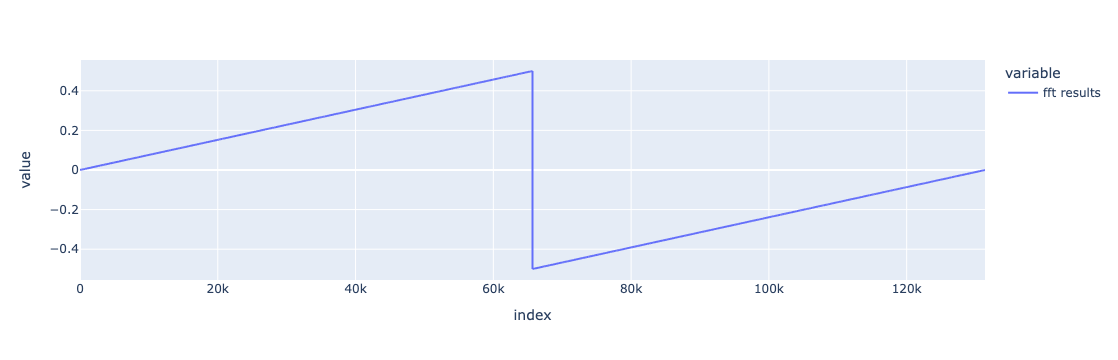

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -44.4888488867651,
  'P-value': 0.0,
  'Lags': np.int64(54),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -44.489
  P-value                         0.000
  Lags                               54
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-52.73467431884064),
  'P-value': 0.0,
  'Lags': 73,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -52.735
  P-value                         0.000
  Lags                               73
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -36.63823408017511,
  'P-value': 0.0,
  'Lags': np.int64(54),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -36.638
  P-value                         0.000
  Lags                               54
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}